## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

In [56]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [57]:
data= pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [58]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [59]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

In [62]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 

In [63]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [64]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [65]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

In [66]:
data

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6,1,1,0,1,0,2,1,1,10,10,0,9,0,5,2,0
8946,6,1,1,0,1,0,2,1,2,10,10,0,9,0,0,2,0
8947,6,1,1,0,1,0,2,1,1,9,9,0,7,0,3,1,0
8948,6,1,0,0,0,1,1,1,1,9,0,0,0,2,3,0,1


Normalizing input values.

In [67]:
from sklearn.preprocessing import StandardScaler #Стандартизация значений

col = data.columns

scale = StandardScaler()
X = scale.fit_transform(data)

X = pd.DataFrame(X, columns=[col])

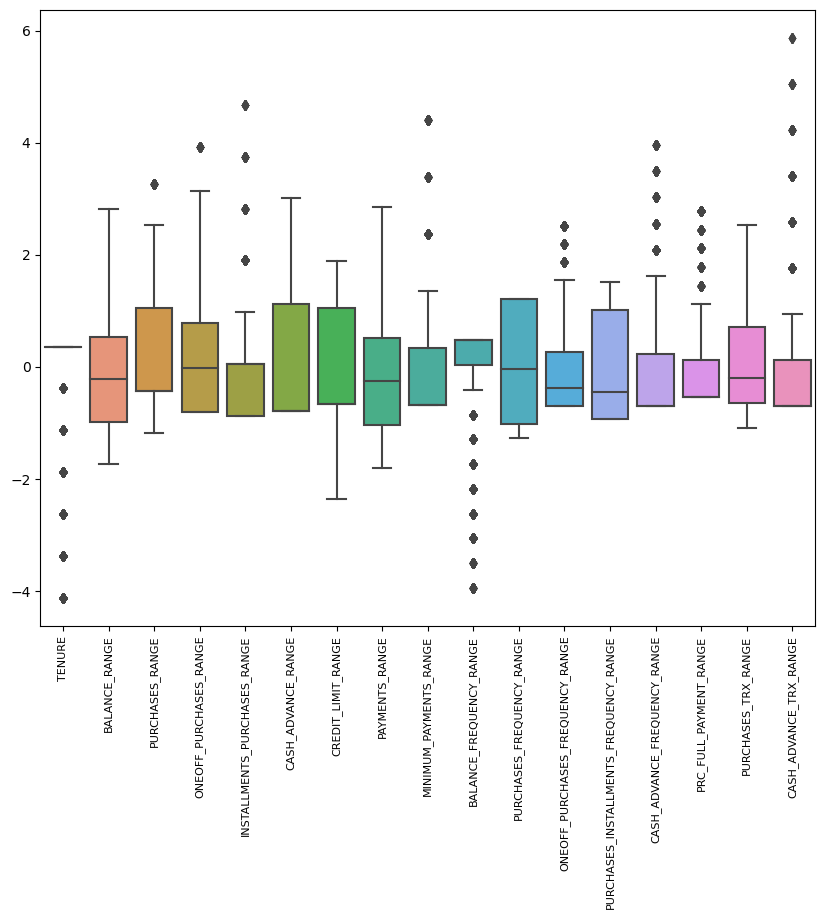

In [68]:
fig, ax = plt.subplots(figsize=(10, 8)) # Визуализация выбросов
sns.boxplot(data = X, ax = ax)
ax.set_xticklabels(col, rotation = 90, size = 8)
plt.show()

In [69]:
for i in X.columns: # Распределение значений по всем столбцам
    print(X[i].value_counts())

 0.360680    7584
-0.386562     365
-1.133803     236
-4.122768     204
-2.628285     196
-3.375526     190
-1.881044     175
Name: (TENURE,), dtype: int64
-0.978511    3598
 0.539152    2699
-0.219680    1122
 1.297983     769
 2.056815     616
-1.737342      80
 2.815646      66
Name: (BALANCE_RANGE,), dtype: int64
-0.438623    3086
-1.180155    2044
 1.044443    1748
 0.302910    1367
 1.785975     415
 2.527508     220
 3.269040      70
Name: (PURCHASES_RANGE,), dtype: int64
-0.802193    4302
-0.014694    2241
 1.560304    1137
 0.772805     897
 2.347803     233
 3.135302     101
 3.922801      39
Name: (ONEOFF_PURCHASES_RANGE,), dtype: int64
-0.871405    3916
 0.052218    2925
 0.975842    1027
 1.899465     928
 2.823089     101
 3.746712      41
 4.670335      12
Name: (INSTALLMENTS_PURCHASES_RANGE,), dtype: int64
-0.786629    4628
 1.114792    1464
-0.152822    1300
 0.480985     642
 1.748600     525
 2.382407     314
 3.016214      77
Name: (CASH_ADVANCE_RANGE,), dtype: int6

In [70]:
purchases_index = np.where(X['PURCHASES_RANGE']>3.22)[0]
instal_index = np.where(X['INSTALLMENTS_PURCHASES_RANGE']>2.5)[0]
min_pay_index = np.where(X['MINIMUM_PAYMENTS_RANGE']>2.3)[0]
bal_freq_index = np.where(X['BALANCE_FREQUENCY_RANGE']<-3)[0]
cash_adv_freq_index = np.where(X['CASH_ADVANCE_FREQUENCY_RANGE']>3)[0]
cash_adv_index = np.where(X['CASH_ADVANCE_TRX_RANGE']>4)[0]

_Так и не получилось убрать лишнее с помощью квантилей, поэтому подчищал используя боксплот и распределение_

_С data работает нормально, а с X все удаляет, возможно проблема действительно во float значениях_

_Попробовал еще с помощью IQR(межквартильный диапазон), тоже результатов не дал, к сожалению_

In [71]:
drop_indexes = np.concatenate([purchases_index, instal_index, min_pay_index,
                               bal_freq_index, cash_adv_freq_index, cash_adv_index])
X.drop(index = drop_indexes, inplace = True)

In [72]:
X

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039345,1.293765,1.355251,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039345,-0.260907,0.338358,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039345,-1.815578,0.338358,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.662473,-0.260907,-0.678535,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,0.338358,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.364292,-1.038243,-0.678535,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978


In [73]:
!pip install yellowbrick

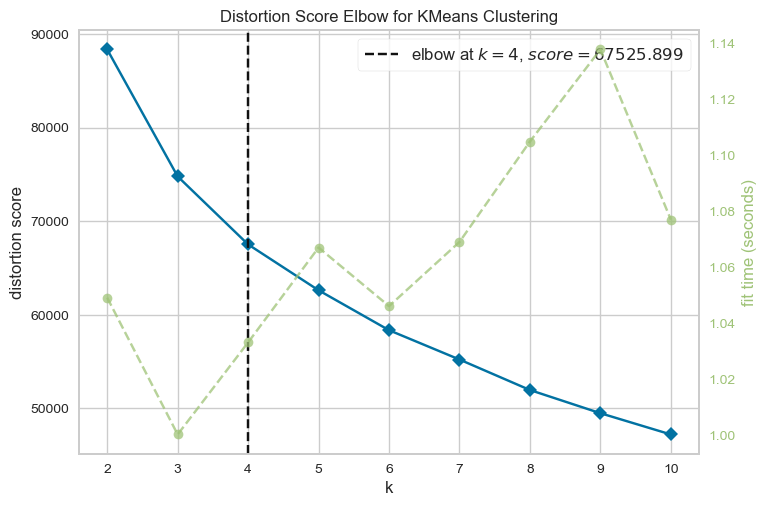

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

kmeans = KMeans(random_state = 42)

Visualiser_eibow = KElbowVisualizer(kmeans, k = (2, 11))
Visualiser_eibow.fit(X)

Visualiser_eibow.show()

_Метод локтя показывает, что оптимальным будет 4 кластера, но линия очень уж плавная и "локоть" здесь заметить крайне проблематично_

_Доверюсь тому, что есть_

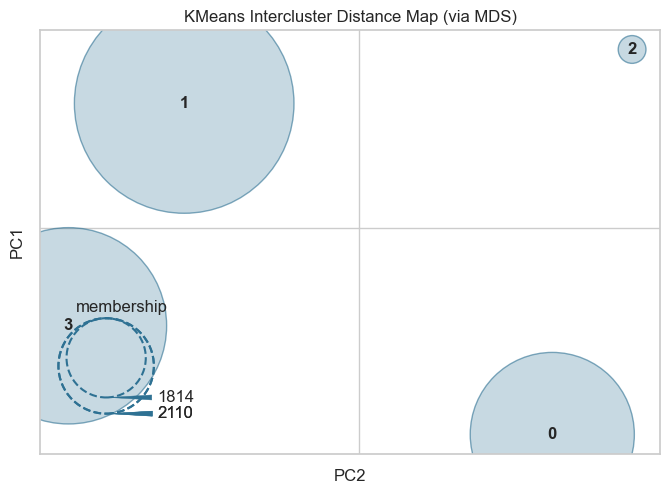

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [75]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(n_clusters=4, random_state=42)

visual_distance = InterclusterDistance(model)
visual_distance.fit(X)

visual_distance.show()

_Если я правильно понял график расстояния между кластерами, то есть сомнения по поводу 4х кластеров, ведь расстояние между ними довольно таки маленькое получается, возможно ошибаюсь, но следует провизуализировать разбиение на 3 кластера_

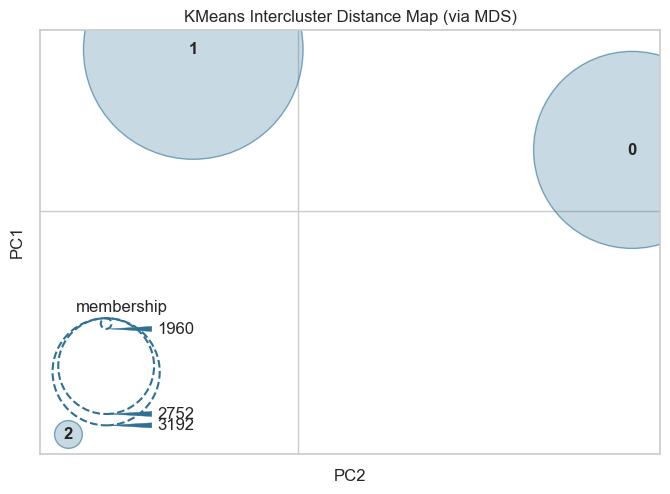

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [76]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)

visual_dist_3 = InterclusterDistance(kmeans_3)
visual_dist_3.fit(X)

visual_dist_3.show()

_С 3я кластерами ситуация еще хуже, поэтому пусть их будет 4_

**Что покажет метод силуэта**

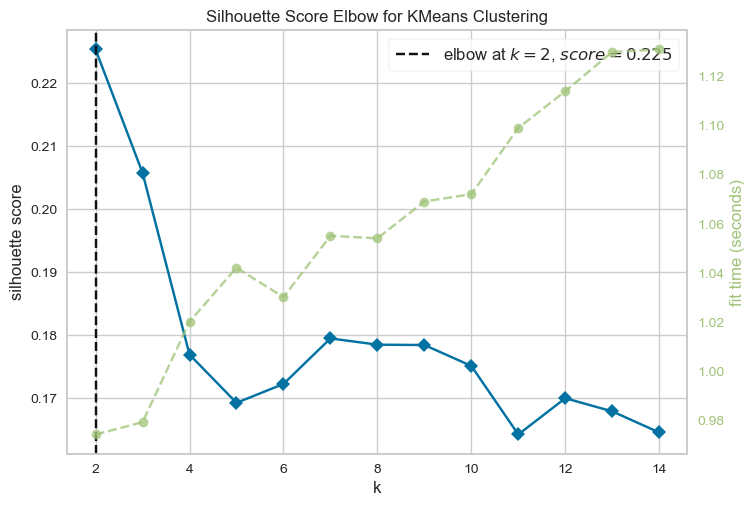

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [77]:
model = KMeans(random_state=42)

visual_silhouette = KElbowVisualizer(model, k = (2, 15), metric='silhouette')
visual_silhouette.fit(X)

visual_silhouette.show()

_Ну это вообще похоже на бред, да и силуэта здесь никакого нет_

In [185]:
kmeans_2 = KMeans(n_clusters=2, random_state=42) # Обучение на 2х кластерах

kmeans_2.fit(X)
kmeans_4 = KMeans(n_clusters=4).fit(X)

In [186]:
df_kmeans = X.copy()
df_kmeans.loc[:, 'Kmeans_2'] = kmeans_2.labels_
df_kmeans.loc[:, 'Kmeans_4'] = kmeans_4.labels_

In [187]:
df_kmeans

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,Kmeans_2,Kmeans_4
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622,1,0
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039345,1.293765,1.355251,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978,1,2
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039345,-0.260907,0.338358,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622,0,1
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039345,-1.815578,0.338358,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978,1,0
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.662473,-0.260907,-0.678535,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622,0,3
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,0.338358,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622,0,3
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.513383,-1.038243,-0.678535,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622,0,3
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.364292,-1.038243,-0.678535,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978,1,0


In [189]:
for i in df_kmeans[['Kmeans_2', 'Kmeans_4']]:
    print(df_kmeans[i].value_counts())

0    4145
1    3759
Name: (Kmeans_2,), dtype: int64
0    2434
3    2085
1    1798
2    1587
Name: (Kmeans_4,), dtype: int64


**PCA KMEANS**

In [215]:
from sklearn.decomposition import PCA
pca_kmeans = PCA(n_components=2).fit_transform(X)

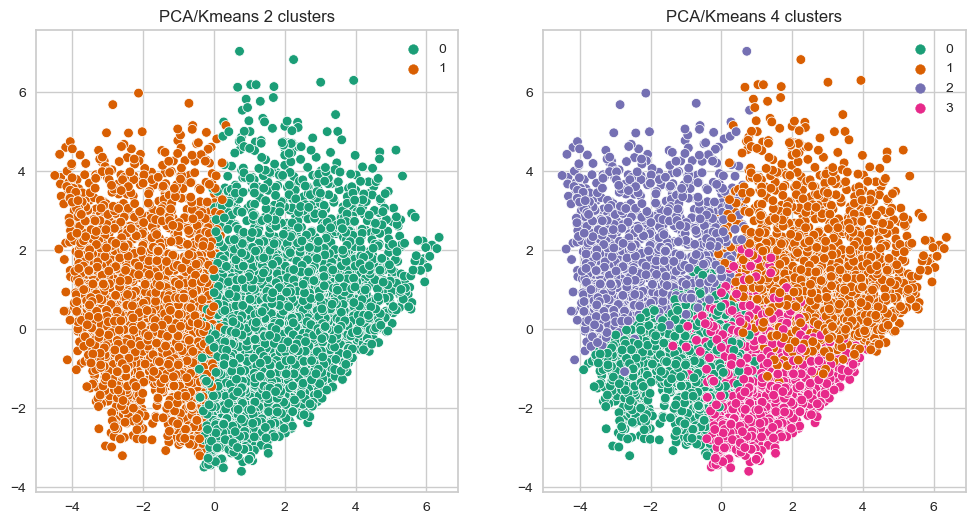

In [216]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))

sns.scatterplot(x = pca_kmeans[:, 0], y = pca_kmeans[:, 1], hue= kmeans_2.labels_, palette='Dark2', ax = ax[0])
ax[0].set_title('PCA/Kmeans 2 clusters')

sns.scatterplot(x = pca_kmeans[:, 0], y = pca_kmeans[:, 1], hue = kmeans_4.labels_, palette='Dark2', ax = ax[1])
ax[1].set_title('PCA/Kmeans 4 clusters')

plt.show()

**TSNE KMEANS**

In [213]:
from sklearn.manifold import TSNE

tsne_kmeans = TSNE(random_state=42).fit_transform(X)

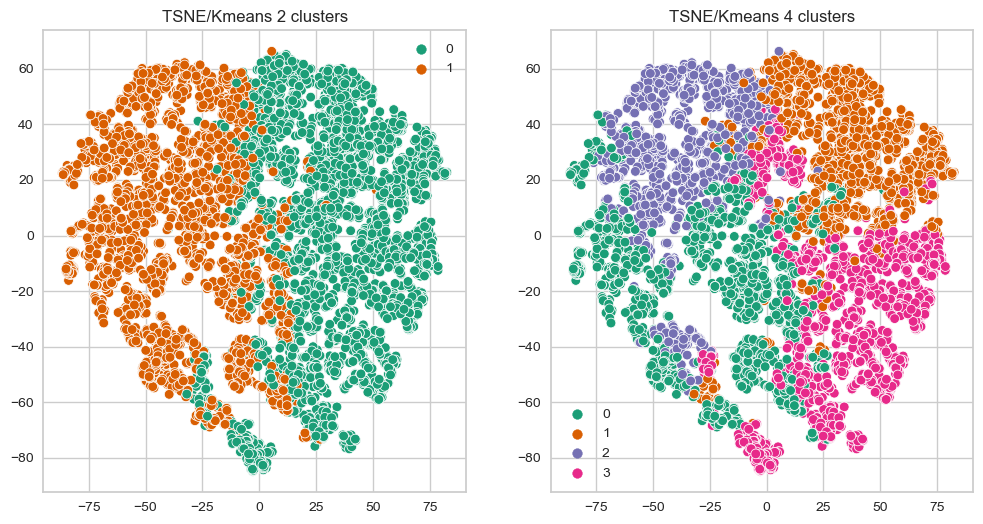

In [218]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

sns.scatterplot(x = tsne_kmeans[:, 0], y = tsne_kmeans[:, 1], hue = kmeans_2.labels_, palette = 'Dark2', ax = ax[0])
ax[0].set_title('TSNE/Kmeans 2 clusters')

sns.scatterplot(x = tsne_kmeans[:, 0], y = tsne_kmeans[:, 1], hue = kmeans_4.labels_, palette = 'Dark2', ax = ax[1])
ax[1].set_title('TSNE/Kmeans 4 clusters')
                
plt.show()

**Метод DBSCAN**

In [111]:
from sklearn.cluster import DBSCAN
from itertools import product

In [114]:
dbs_1 = DBSCAN(eps = 0.4, algorithm='brute').fit(X)

In [241]:
dbs_1.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [246]:
np.sum(dbs_1.labels_==-1)

6092

In [243]:
np.unique(dbs_1.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [245]:
dbs_2 = DBSCAN(eps = 0.5, min_samples= 3).fit(X)
np.unique(dbs_2.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [249]:
np.sum(dbs_2.labels_ == -1)

6092

_С заданными параметрами получается один большой выброс и много маленьких кластеров_

In [255]:
eps_values = np.arange(0.5, 5.5, 0.5)
min_samples = np.arange(30, 100, 10)

DBSCAN_params = list(product(eps_values, min_samples)) # Решил подрезать

In [29]:
#pram = []
#for i in eps_values:
#    for m in min_samples:
#        pram = (i, m)
#        print(pram)

In [269]:
dbs_clusters = []
dbs_values = []

for i in DBSCAN_params:
    dbs = DBSCAN(eps = i[0], min_samples=i[1]).fit(X)
    dbs_clusters.append(len(np.unique(dbs.labels_)))
    dbs_values.append(dbs.labels_)

In [275]:
dbs_values==-1

False

In [277]:
dbs.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [280]:
len(dbs_values)

70

In [282]:
range(0,70)

range(0, 70)

In [287]:
out_sum = []

for i in range(0, 70):
    outliers = np.sum(dbs_values[i]==-1)
    out_sum.append(outliers)

In [289]:
tmp = pd.DataFrame(DBSCAN_params, columns = ['eps_values', 'min_samples'])
tmp['dbs_clusters'] = dbs_clusters
tmp['outliers'] = out_sum

In [290]:
pivot_cl = pd.pivot_table(tmp, values='dbs_clusters', index='min_samples',
                       columns='eps_values').style.background_gradient('autumn_r')
pivot_cl

eps_values,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,4.000000,4.500000,5.000000
min_samples,,,,,,,,,,
30,3,9,5,2,2,2,2,1,1,1
40,3,8,3,2,2,2,2,1,1,1
50,2,6,3,2,2,2,2,1,1,1
60,2,5,2,2,2,2,2,1,1,1
70,2,4,2,2,2,2,2,1,1,1
80,2,4,2,2,2,2,2,1,1,1
90,1,4,2,2,2,2,2,1,1,1


In [296]:
pivot_out = pd.pivot_table(tmp, values='outliers', index='min_samples',
                           columns='eps_values').style.background_gradient('autumn_r')
pivot_out

eps_values,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,4.000000,4.500000,5.000000
min_samples,,,,,,,,,,
30,7773,6428,3555,941,180,28,1,0,0,0
40,7779,6780,4022,1104,223,32,2,0,0,0
50,7819,7037,4249,1261,256,43,4,0,0,0
60,7819,7204,4595,1429,289,46,9,0,0,0
70,7819,7390,4755,1675,330,51,9,0,0,0
80,7819,7431,4930,1847,367,69,11,0,0,0
90,7904,7468,5096,2088,428,70,13,0,0,0


_Если сравнить данные сводные таблицы, можно заметить, что при значениях эпсилон меньше 1.5 и любом  минимальном количестве точек (из тех что я выбрал), выбросов больше половины. их, на мой взгляд, даже нет смысла рассматривать.

_В случаях, когда значение эпсилон 2 или более, все приобразовывается в один большой кластер, с минимальным количеством выбросов_

_Необходимо проверить данные при меньшем количестве точек_

In [322]:
np.unique(min_samles_1)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [329]:
min_samles_1 = []

for i in range(3, 33, 3):
    dbs_min_samples_1 = DBSCAN(eps=2, min_samples=i)
    Dscan = dbs_min_samples_1.fit(X)
    min_samles_1.append(Dscan.labels_)
    
for m in range(0, len(min_samles_1)):
    outl_1 =sum(min_samles_1[m]==-1)
    clust_1 = np.unique(min_samles_1[m])
    print('min_samles: {} | outliers: {} | clusters: {}'.format(m, outl_1, clust_1))

min_samles: 0 | outliers: 277 | clusters: [-1  0  1  2  3  4  5  6]
min_samles: 1 | outliers: 359 | clusters: [-1  0  1  2]
min_samles: 2 | outliers: 443 | clusters: [-1  0]
min_samles: 3 | outliers: 518 | clusters: [-1  0]
min_samles: 4 | outliers: 572 | clusters: [-1  0]
min_samles: 5 | outliers: 634 | clusters: [-1  0]
min_samles: 6 | outliers: 729 | clusters: [-1  0]
min_samles: 7 | outliers: 809 | clusters: [-1  0]
min_samles: 8 | outliers: 862 | clusters: [-1  0]
min_samles: 9 | outliers: 941 | clusters: [-1  0]
